First we import all the libraries that we will be needing

In [1]:
import matplotlib.patches as patches
from matplotlib.pylab import subplots
import matplotlib.pyplot as plt
import random
import math
import numpy as np

=========================================================================================================================

We define functions to randomly generate the width, height and top left corner co-ordinates

In [2]:
def random_width():
    '''
    Returns a random integer width between (including)
    1 and the area width
    '''
    return random.randint(1,Area_width)

def random_height():
    '''
    Returns a random integer width between (including)
    1 and the area height
    '''
    return random.randint(1,Area_height)

def top_left(obj):
    '''
    Takes into account the width and height of the rectangle and then
    returns a tuple with random integers for the x and y co-ordinates of the top left corner of the rectangle 
    '''
    min_x = 0
    max_x = Area_width - obj.width
    min_y = obj.height
    max_y = Area_height
    return (random.randint(min_x,max_x),random.randint(min_y,max_y))

We define a function to Crop our generated rectangles to the maximum area non-overlapping rectangles

In [3]:
def Rectangle_Crop(rectangle):
    '''
    Takes as input a new rectangle object.
    Creates all possible sub-rectangles within the input rectangle.
    Checks if the sub-rectangles overlap with any of the existing rectangles.
    Returns the new width, new height, new bottom left co-ordinates, new top left co-ordinates, 
    and area of largest non-overalpping sub-rectangle
    '''
    max_area = 0 # Max Sub-Rectangle area initialized to 0
    new_width = rectangle.width
    new_height = rectangle.height
    new_bottom_left = rectangle.bottom_left
    new_top_left = rectangle.top_left
    for i in range(rectangle.bottom_left[0],rectangle.bottom_left[0]+rectangle.width):           # Starting x coordinate
        
        for j in range(rectangle.bottom_left[1],rectangle.bottom_left[1]+rectangle.height):      #Starting y coordinate
            
            for k in range(1,rectangle.width-(i-rectangle.bottom_left[0])+1):                    #Ending x coordinate
                
                for l in range(1,rectangle.height-(j-rectangle.bottom_left[1])+1):               #Ending y coordinate
                    
                    if sum(map(sum, mask[mask.shape[0]-(j+l):mask.shape[0]-j,i:i+k])) == 0:      #Checking that the sub-rectangle doesn't overlap any existing rectangle
                        
                        if k*l > max_area:                                                       #Checking if sub-rectangle area is greater than current max area
                            new_width,new_height,new_bottom_left,new_top_left = k,l,(i,j),(i,j+l)
                            max_area = k*l
    return new_width,new_height,new_bottom_left,new_top_left,max_area

We define a class rectangle to make objects representing the Towers

In [4]:
class rectangle(object):
    '''
    Objects of this class represent the communication towers on the grid.
    They have width, height,top left corner co-ordiantes and bottom left corner co-ordinates as attributes.
    They have a Max_Crop method which crops them such that they become the maximum area non-overlapping 
     sub-rectangle that could be made from the original.
    They have a mask method that updates the mask matrix with 1's after the object has been cropped.
    They also have area and data methods which return the area and data respectively.
    '''
    
    def __init__(self, crop = True):
        '''
        Initializes random values for the width,height and top_left corner.
        Also calls Max_Crop and mask.
        '''
        self.width = random_width()
        self.height = random_height()
        self.top_left = top_left(self)
        self.bottom_left = (self.top_left[0],self.top_left[1]-self.height)
        if crop:
            self.Max_Crop()
            self.mask()

    def mask(self):
        '''
        Updates the relevant values to 1 in the mask matrix.
        '''
        for i in range(self.bottom_left[0],self.bottom_left[0]+self.width):
            for j in range (Area_height - self.top_left[1],Area_height - self.bottom_left[1]):
                mask[j][i] = 1
    
    def Max_Crop(self):
        '''
        Crops the rectangle to the maximum area non-overlapping rectanlge.
        '''
#         print("Max Cropping")
        self.width,self.height,self.bottom_left,self.top_left,self.max_area = Rectangle_Crop(self) #updating trimmed values
        if self.max_area == 0:    # If the rectangle is completely inside a covered area, new attributes are generated
            self.width = random_width()
            self.height = random_height()
            self.top_left = top_left(self)
            self.bottom_left = (self.top_left[0],self.top_left[1]-self.height)
            self.Max_Crop() 
                
    def area(self):
        '''
        Returns area of the rectangle
        '''
        return self.width*self.height
    
    def data(self):
        '''
        Prints the top-left corner co-ordinate, width, height and area of the rectangle.
        '''
        print("Top Left : ", self.top_left)
        print("Width : ", self.width)
        print("Height : ",self.height)
        print("Area : ",self.area())

We define a function which returns the resolved area and ratio of resolved to total area

In [5]:
def Resolved_Area():
    '''
    Returns a tuple containing the area covered by the towers and the ratio of covered to total area
    '''
    total_area = Area_height*Area_width
    covered_area = 0
    for tower in Towers:
        covered_area += tower.area()
    return (covered_area,covered_area/total_area)

We define a function to see how many towers it takes to cover the entire area

In [6]:
def full_coverage():
    '''
    Creates rectangles till the entire area is covered by rectanges.
    This means there are no regions without coverage left in the area.
    '''
    while Resolved_Area()[1] != 1:
        tower_populate(10)
    print("Total Area Covered by ",len(Towers)," Towers")
    print("----------------------------------------------------------------------------------")
    

We define a function to return a random color from a list of colors to fill in the rectangles

In [7]:
def random_color():
    '''
    Returns a random color from the list containing 
    Blue, green, red, cyan, magenta, yellow and black
    '''
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    return random.choice(color_list)

We define a function for populating our list of rectangle objects passing the number of rectangles to be created as the argument

In [8]:
def tower_populate(n):  
    '''
    Creates Rectangle Objects and adds them to the list of Towers.
    The number of rectangles created are either the value stored in Number_of_towers or till the entire area is covered.
    '''
    for i in range(n):
        if Resolved_Area()[1] == 1:   # We dont want to create towers if the entire area is already covered
            print(len(Towers),"Towers created\nResolved Area Ratio = 1.00\nCannot Create more Towers")
            print("----------------------------------------------------------------------------------")
            break
        else:
            Towers.append(rectangle())

We define a function for plotting the state of the area under consideration

In [9]:
def plotting(list_of_towers,example = False):
    '''
    This function is used for plotting the rectangles on the given area.
    The color of the towers and their transparency are random. 
    '''
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig,ax = subplots()
    if example == True:
        i = 0
        for tower in list_of_towers:   
            ax.add_patch(patches.Rectangle((tower.top_left[0],(tower.top_left[1]-tower.height)),tower.width,tower.height,color = color_list[i] ,alpha=0.7)) # alpha is transparency
            i += 1
        ax.axis([0,Area_width,0,Area_height])
    else:
        for tower in list_of_towers:   
            ax.add_patch(patches.Rectangle((tower.top_left[0],(tower.top_left[1]-tower.height)),tower.width,tower.height,color = random_color() ,alpha=random.uniform(0.3,0.9))) # alpha is transparency
        ax.axis([0,Area_width,0,Area_height])
        # ax.grid('on')
    return fig

========================================================================================================================
First we show the cropping in action.
We will generate 5 random rectangles to do this.
If by chance there are no overlapping rectangles among these 5, please run the script from this cell again. 

In [10]:
Area_height,Area_width = 10,10
mask = np.zeros((Area_height,Area_width))
example_list = []

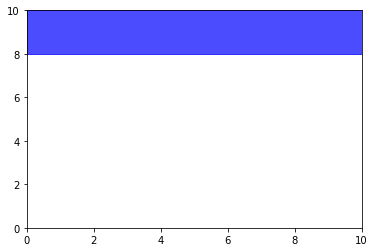

In [11]:
example_list.append(rectangle(crop = False))
plotting(example_list,example = True)

Above is the first rectangle generated

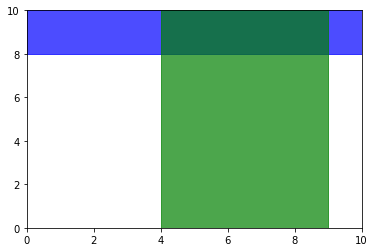

In [12]:
example_list[0].mask()
example_list.append(rectangle(crop = False))
plotting(example_list, example = True)

Above is the first and second generated rectangles without cropping

NOTE : If a newly generated rectangle is completely covered by previous rectangles, its attributes are re-initialized when we crop.

In [13]:
example_list[1].Max_Crop()

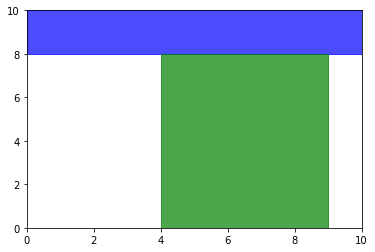

In [14]:
example_list[1].mask()
plotting(example_list, example = True)

Above is the first and second generated rectangles with cropping

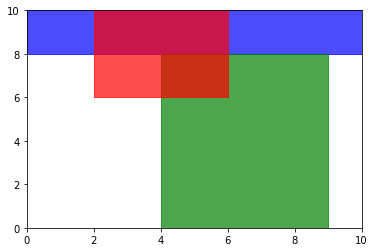

In [15]:
example_list.append(rectangle(crop = False))
plotting(example_list, example = True)

Above is the first,second and third generated rectangles without cropping

NOTE : If a newly generated rectangle is completely covered by previous rectangles, its attributes are re-initialized when we crop.

In [16]:
example_list[2].Max_Crop()

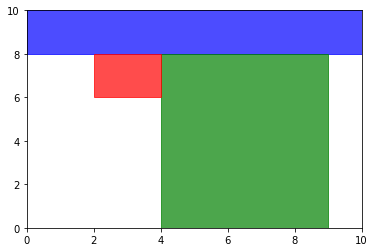

In [17]:
example_list[2].mask()
plotting(example_list, example = True)

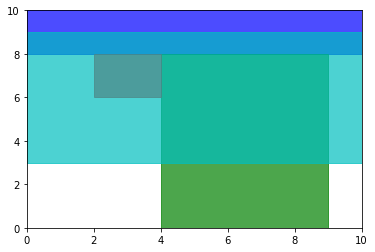

In [18]:
example_list.append(rectangle(crop = False))
plotting(example_list, example = True)

Above is the first,second,third and fourth generated rectangles without cropping.

NOTE: If a newly generated rectangle is completely covered by previous rectangles, its attributes are re-initialized when we crop.

In [19]:
example_list[3].Max_Crop()

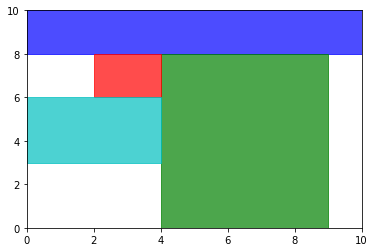

In [20]:
example_list[3].mask()
plotting(example_list, example = True)

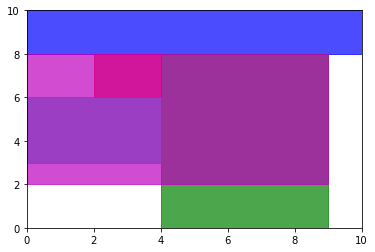

In [21]:
example_list.append(rectangle(crop = False))
plotting(example_list, example = True)

Above is the first,second,third,fourth and fifth generated rectangles without cropping.

NOTE : If a newly generated rectangle is completely covered by previous rectangles, its attributes are re-initialized when we crop.

In [22]:
example_list[4].Max_Crop()

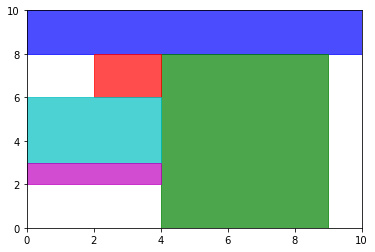

In [23]:
example_list[4].mask()
plotting(example_list, example = True)

We see the 5 rectangles with max cropping applied in sequence above

========================================================================================================================

Now to answer the First Question "Given an overall desired coverage footprint and a sequence of n communications
towers, what is the resulting resolved coverage?"

=========================================================================================================================

We take the inputs for the Region Width, Region Height and Number of Towers

Note : It is advisable to use small input sizes for the width and height as the running time of the algorithm is proportional to the product of squares of both these values. Suggested Values are 10,10

In [24]:
while True:
    try:
        Area_width = int(input("Input Region Width(integer value) ? \n"))
        assert Area_width > 0
        break
    except:
        print("Please input a positive integer value")

Input Region Width(integer value) ? 
10


In [25]:
while True:
    try:
        Area_height = int(input("Input Region height(positive integer value) ? \n"))
        assert Area_height > 0
        break
    except:
        print("Please input a positive integer value")

Input Region height(positive integer value) ? 
10


In [26]:
while True:
    try:
        Number_of_towers = int(input("Input Number_of_towers(positive integer value) ? \n"))
        assert Number_of_towers > 0
        break
    except:
        print("Please input a positive integer value")

Input Number_of_towers(positive integer value) ? 
10


We define a matrix named "mask" which has 0's for every unit 
square in the grid that is not under tower coverage and 1's if 
it is under tower coverage.

This mask matrix makes it easy to check if and where new towers are overlapping with previous towers.

We just need to see if there are any 1's in the same positions in mask as the new tower under question, and if there is it means that there is some overlap with a previously existing tower

In [27]:
mask = np.zeros((Area_height,Area_width))

In [28]:
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

For example run the following cells

In [29]:
Towers = []
Towers.append(rectangle())

Top Left :  (0, 10)
Width :  3
Height :  9
Area :  27


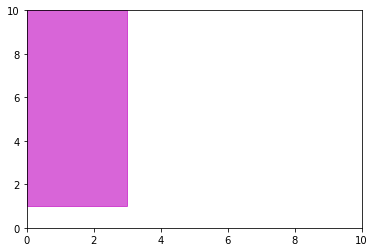

In [30]:
fig,ax = subplots()
for tower in Towers:   
    tower.data()
    ax.add_patch(patches.Rectangle((tower.top_left[0],(tower.top_left[1]-tower.height)),tower.width,tower.height,color = random_color() ,alpha=random.uniform(0.4,0.7))) # alpha is transparency
ax.axis([0,Area_width,0,Area_height])
fig

The corresponding mask is

In [31]:
mask

array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
mask = np.zeros((Area_height,Area_width))
Towers = []

=======================================================================================================================
Now we see what happens when we place n communication towers on the coverage area you specified

In [33]:
tower_populate(Number_of_towers)

9 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------


The resulting coverage looks as follows

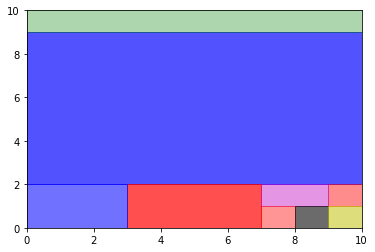

In [34]:
plotting(Towers)

The Resolved Coverage is

In [35]:
Resolved_Area()[0]

100

The total area of coverage relative to the desired total coverage area of the original footprint is

In [36]:
Resolved_Area()[1]

1.0

Are there any gaps in the coverage?

In [37]:
if Resolved_Area()[1] == 1:
    print("No Gaps in the coverage")
else:
    print("Yes there are gaps in the coverage")

No Gaps in the coverage


To check how "On average, how many communications towers are required before full coverage is
obtained" we run full_coverage 150 times and see the average number of towers it took to cover the given area

In [38]:
count_list = [] # This list stores the number of towers needed for full coverage each time full_coverage is called.
for i in range(150):
    Towers = []
    mask = np.zeros((Area_height,Area_width))
    full_coverage()
    count_list.append(len(Towers))

25 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  25  Towers
----------------------------------------------------------------------------------
15 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  15  Towers
----------------------------------------------------------------------------------
7 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  7  Towers
----------------------------------------------------------------------------------
17 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  17  Towers
-

----------------------------------------------------------------------------------
Total Area Covered by  15  Towers
----------------------------------------------------------------------------------
19 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  19  Towers
----------------------------------------------------------------------------------
5 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  5  Towers
----------------------------------------------------------------------------------
15 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  15  Towers
------------------------------------------------------------------------

----------------------------------------------------------------------------------
Total Area Covered by  15  Towers
----------------------------------------------------------------------------------
7 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  7  Towers
----------------------------------------------------------------------------------
17 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  17  Towers
----------------------------------------------------------------------------------
12 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  12  Towers
------------------------------------------------------------------------

Total Area Covered by  17  Towers
----------------------------------------------------------------------------------
13 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  13  Towers
----------------------------------------------------------------------------------
13 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  13  Towers
----------------------------------------------------------------------------------
5 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  5  Towers
----------------------------------------------------------------------------------
12 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
-

Total Area Covered by  20  Towers
----------------------------------------------------------------------------------
14 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  14  Towers
----------------------------------------------------------------------------------
17 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  17  Towers
----------------------------------------------------------------------------------
9 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
----------------------------------------------------------------------------------
Total Area Covered by  9  Towers
----------------------------------------------------------------------------------
21 Towers created
Resolved Area Ratio = 1.00
Cannot Create more Towers
-

In [39]:
running_avg = [] # this list will store the running average of the number of towers required for different number of full_coverage calls
score = 0
for i in range(len(count_list)):
    score += count_list[i]
    running_avg.append(score/(i+1))

On average it takes the following number of towers to cover the specified area

In [40]:
running_avg[-1]

13.286666666666667

In [41]:
plt.close()

In [44]:
plt.close()

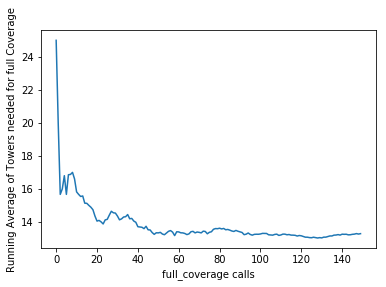

In [45]:
plt.figure()
x = np.arange(150)
plt.xlabel("full_coverage calls")
plt.ylabel("Running Average of Towers needed for full Coverage")
plt.plot(x,running_avg)
plt.show()

This graph of the running average shows that the running average is well approximated by running it full_coverage 150 times

======================================================================================================================